# LDA

We have transformed data to the correct range.

Data shape: (174, 51)
Labels shape: (174,)
Unique labels: ['Frooti' 'Maza' 'PaperBoat' 'RealJ']


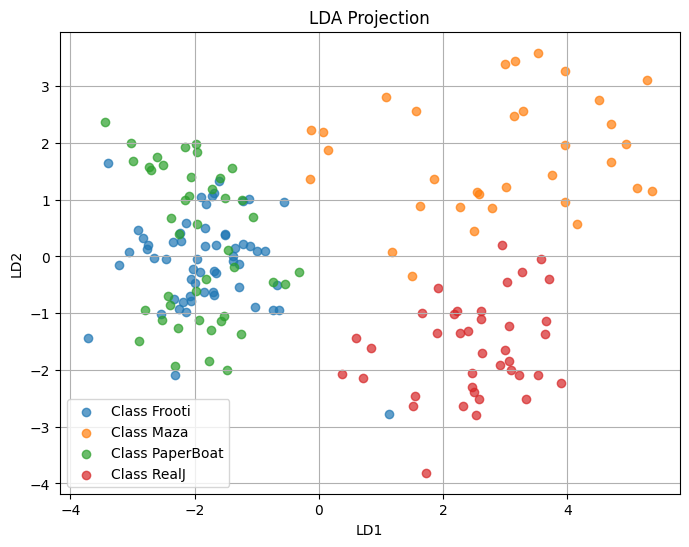

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# -------------------------
# 1. List your CSV paths, one per class
# -------------------------
csv_files = {
    "F": "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/t12_tF.csv",
    "P": "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/t12_tP.csv",
    "M": "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/t22M.csv",
    "R": "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/t22R.csv"
}

X_list = []
y_list = []

for label, path in csv_files.items():
    df = pd.read_csv(path)
    
    # 4th column (index 3) is labels
    y_list.append(df.iloc[:, 3].values)
    
    # From 5th column onward (index 4:) are features
    X_list.append(df.iloc[:, 4:].values)

# -------------------------
# 2. Stack all data together
# -------------------------
X = np.vstack(X_list)   # features
y = np.hstack(y_list)   # labels

print("Data shape:", X.shape)   # (n_samples, n_features)
print("Labels shape:", y.shape) # (n_samples,)
print("Unique labels:", np.unique(y))

# -------------------------
# 3. Apply LDA (reduce to 2D)
# -------------------------
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# -------------------------
# 4. Plot
# -------------------------
plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=f"Class {label}", alpha=0.7)

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA Projection")
plt.legend()
plt.grid(True)
plt.show()


# LDA for Raw Data

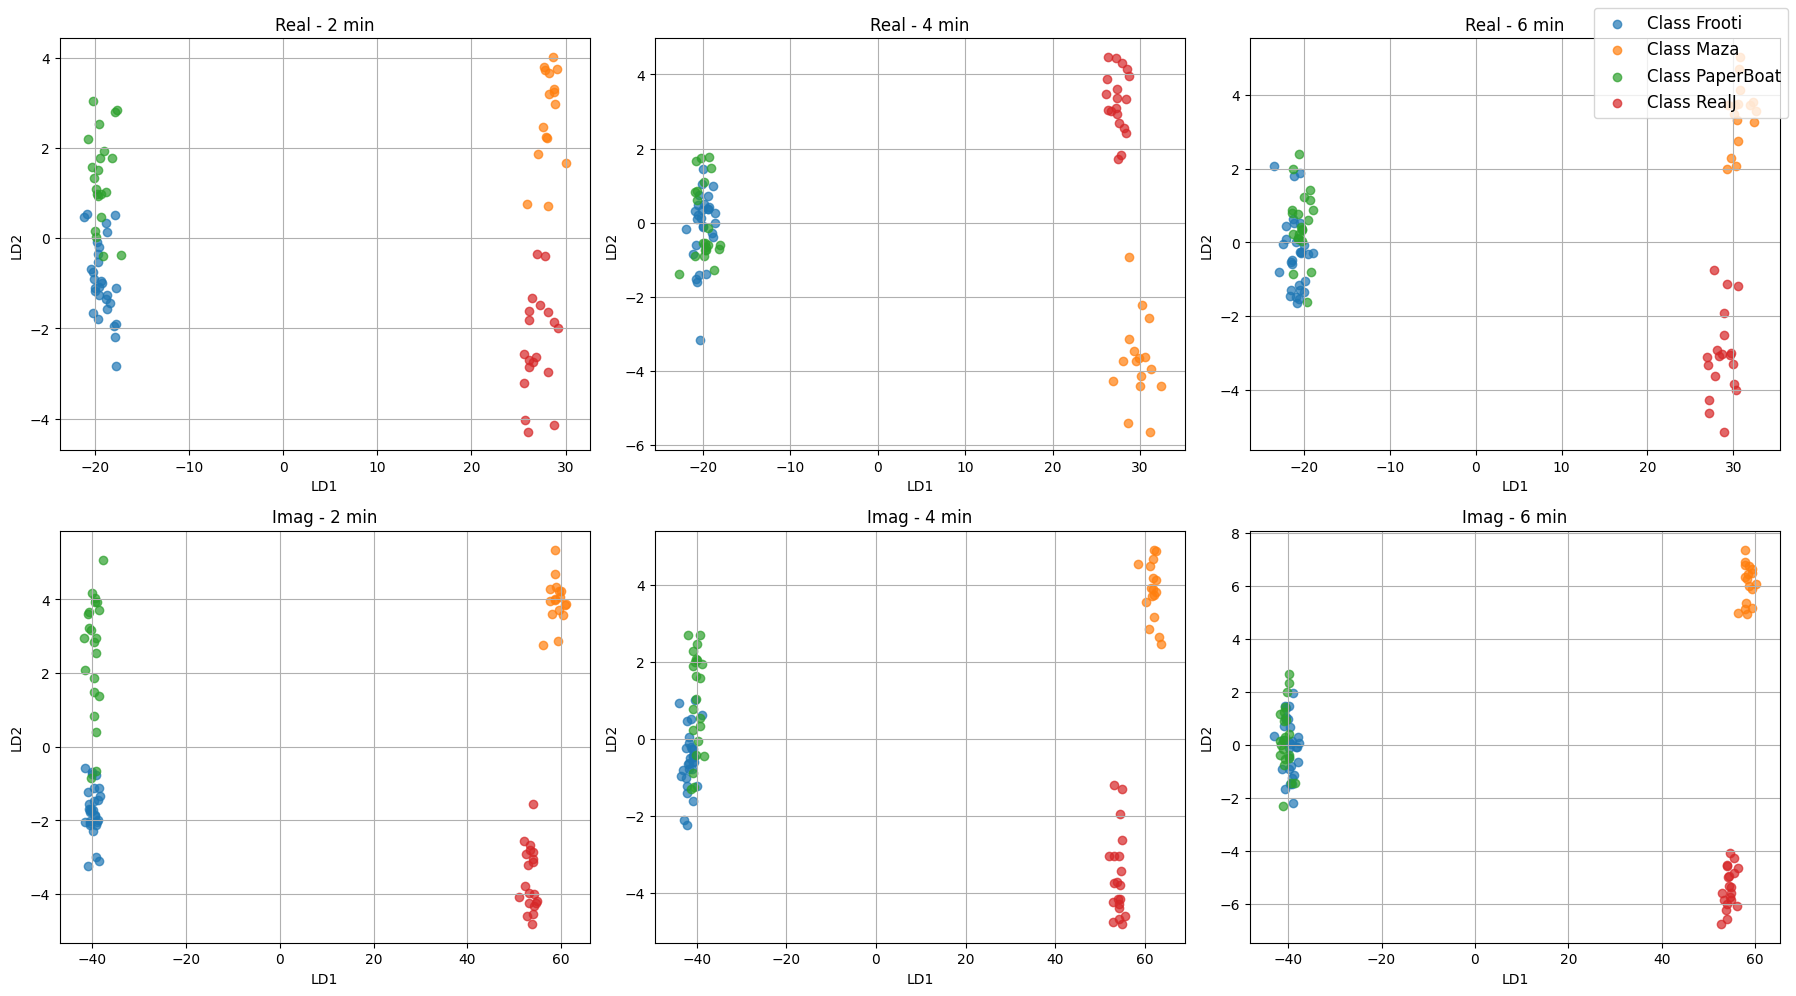

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import os

def run_lda_on_groups(folder, file_list, axs, row_offset, folder_name):
    """
    Runs LDA on groups of 4 consecutive CSV files inside one folder.
    Each group corresponds to 4 classes.

    Parameters:
        folder (str): Folder path containing CSVs
        file_list (list): Ordered list of file names (strings)
        axs: matplotlib Axes grid (2x3)
        row_offset: int, 0 for first row, 1 for second row
        folder_name: str, used in subplot titles
    """
    num_groups = len(file_list) // 4
    group_labels = {0: "2 min", 1: "4 min", 2: "6 min"}

    for g in range(num_groups):
        # Get 4 consecutive files
        group_files = file_list[g*4 : (g+1)*4]

        X_list, y_list = [], []

        for fname in group_files:
            path = os.path.join(folder, fname)
            df = pd.read_csv(path)

            # 4th column (index 3) is labels
            y_list.append(df.iloc[:, 3].values)

            # From 5th column (index 4:) are features
            X_list.append(df.iloc[:, 4:].values)

        # Stack all
        X = np.vstack(X_list)
        y = np.hstack(y_list)

        # Apply LDA (reduce to 2D)
        lda = LDA(n_components=2)
        X_lda = lda.fit_transform(X, y)

        # Subplot position
        ax = axs[row_offset, g]

        for label in np.unique(y):
            ax.scatter(X_lda[y == label, 0], X_lda[y == label, 1],
                       label=f"Class {label}", alpha=0.7)

        ax.set_xlabel("LD1")
        ax.set_ylabel("LD2")
        ax.set_title(f"{folder_name} - {group_labels[g]}")
        ax.grid(True)


# -------------------------
# USAGE
# -------------------------
real_folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/here/real"
imag_folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/here/imag"

# Provide ordered file names inside each folder
real_files = [
    "t12_tF_r.csv", "t12_tP_r.csv", "t22M_r.csv", "t22R_r.csv",
    "t14_tF_r.csv", "t14_tP_r.csv", "t24M_r.csv", "t24R_r.csv",
    "t16_tF_r.csv", "t16_tP_r.csv", "t26M_r.csv", "t26R_r.csv"
]

imag_files = [
    "t12_tF_i.csv", "t12_tP_i.csv", "t22M_i.csv", "t22R_i.csv",
    "t14_tF_i.csv", "t14_tP_i.csv", "t24M_i.csv", "t24R_i.csv",
    "t16_tF_i.csv", "t16_tP_i.csv", "t26M_i.csv", "t26R_i.csv"
]

# Create 2x3 grid for 6 plots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Run real (top row) and imag (bottom row)
run_lda_on_groups(real_folder, real_files, axs, row_offset=0, folder_name="Real")
run_lda_on_groups(imag_folder, imag_files, axs, row_offset=1, folder_name="Imag")

# Put legend once (outside)
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=12)

plt.tight_layout()
plt.show()


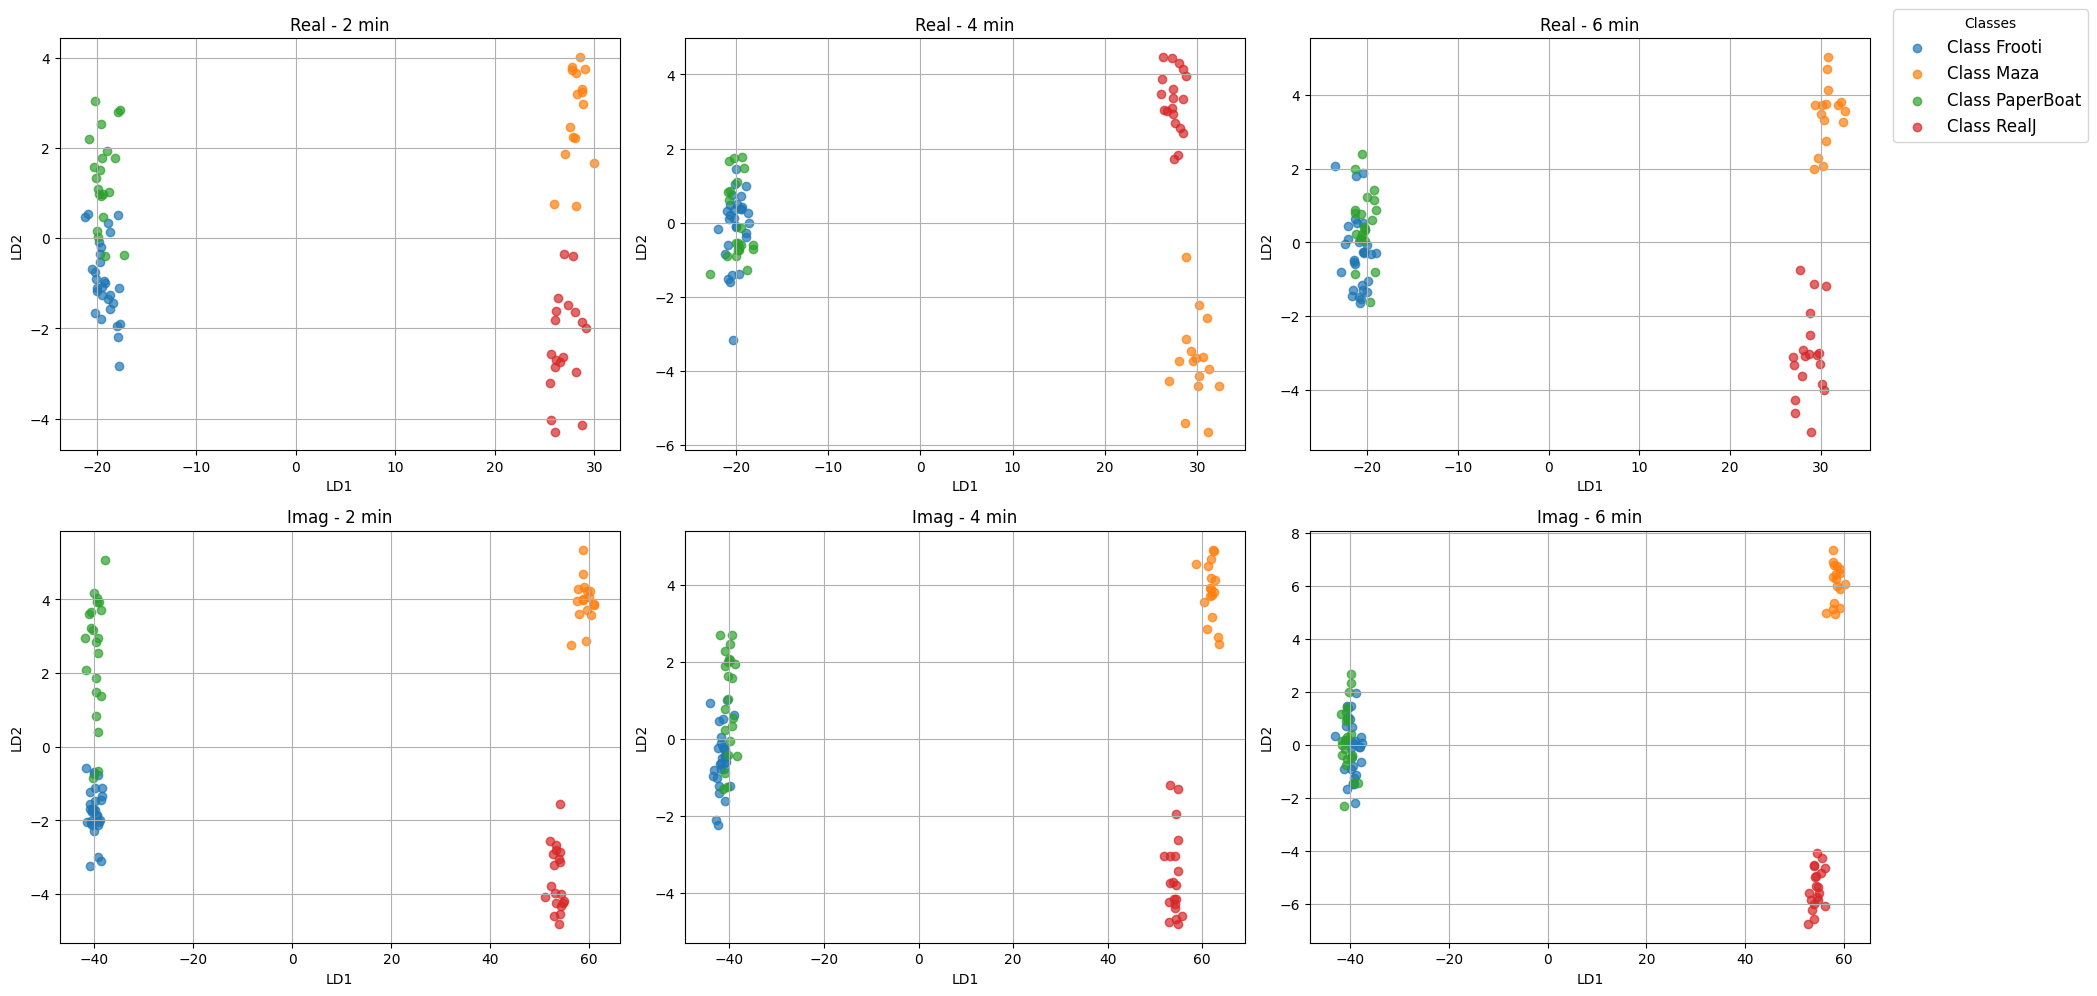

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import os

def run_lda_on_groups(folder, file_list, axs, row_offset, folder_name):
    """
    Runs LDA on groups of 4 consecutive CSV files inside one folder.
    Each group corresponds to 4 classes.

    Parameters:
        folder (str): Folder path containing CSVs
        file_list (list): Ordered list of file names (strings)
        axs: matplotlib Axes grid (2x3)
        row_offset: int, 0 for first row, 1 for second row
        folder_name: str, used in subplot titles
    """
    num_groups = len(file_list) // 4
    group_labels = {0: "2 min", 1: "4 min", 2: "6 min"}

    for g in range(num_groups):
        # Get 4 consecutive files
        group_files = file_list[g*4 : (g+1)*4]

        X_list, y_list = [], []

        for fname in group_files:
            path = os.path.join(folder, fname)
            df = pd.read_csv(path)

            # 4th column (index 3) is labels
            y_list.append(df.iloc[:, 3].values)

            # From 5th column (index 4:) are features
            X_list.append(df.iloc[:, 4:].values)

        # Stack all
        X = np.vstack(X_list)
        y = np.hstack(y_list)

        # Apply LDA (reduce to 2D)
        lda = LDA(n_components=2)
        X_lda = lda.fit_transform(X, y)

        # Subplot position
        ax = axs[row_offset, g]

        for label in np.unique(y):
            ax.scatter(X_lda[y == label, 0], X_lda[y == label, 1],
                       label=f"Class {label}", alpha=0.7)

        ax.set_xlabel("LD1")
        ax.set_ylabel("LD2")
        ax.set_title(f"{folder_name} - {group_labels[g]}")
        ax.grid(True)


# -------------------------
# USAGE
# -------------------------
real_folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/here/real"
imag_folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/here/imag"

# Provide ordered file names inside each folder
real_files = [
    "t12_tF_r.csv", "t12_tP_r.csv", "t22M_r.csv", "t22R_r.csv",
    "t14_tF_r.csv", "t14_tP_r.csv", "t24M_r.csv", "t24R_r.csv",
    "t16_tF_r.csv", "t16_tP_r.csv", "t26M_r.csv", "t26R_r.csv"
]

imag_files = [
    "t12_tF_i.csv", "t12_tP_i.csv", "t22M_i.csv", "t22R_i.csv",
    "t14_tF_i.csv", "t14_tP_i.csv", "t24M_i.csv", "t24R_i.csv",
    "t16_tF_i.csv", "t16_tP_i.csv", "t26M_i.csv", "t26R_i.csv"
]

# Create 2x3 grid for 6 plots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Run real (top row) and imag (bottom row)
run_lda_on_groups(real_folder, real_files, axs, row_offset=0, folder_name="Real")
run_lda_on_groups(imag_folder, imag_files, axs, row_offset=1, folder_name="Imag")

# Put the legend closer to the plot (not too far to the right)
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", fontsize=12, bbox_to_anchor=(1.05, 1), title="Classes")

# Adjust the layout to leave just a small gap on the right for the legend
plt.tight_layout(rect=[0, 0, 1.05, 1])  # Leave a smaller gap on the right side for the legend
plt.show()


### Classification using KNN for RAW Data

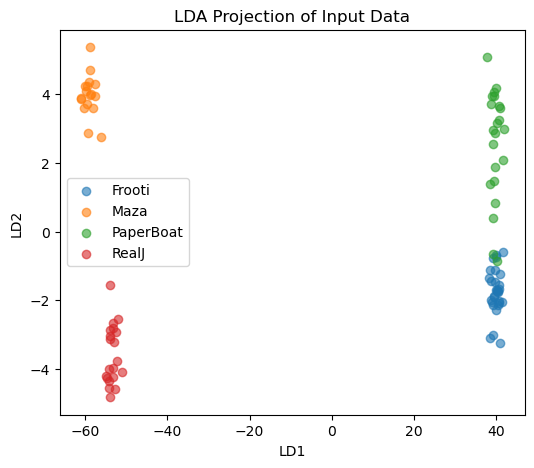

In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# ----------- LOAD DATA -----------
folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/here/imag"
file_list = [
    "t12_tF_i.csv", 
    "t12_tP_i.csv", 
    "t22M_i.csv", 
    "t22R_i.csv"
]

X_list, y_list = [], []
for fname in file_list:
    path = os.path.join(folder, fname)
    df = pd.read_csv(path)

    y_list.append(df.iloc[:, 3].values)     # Labels (4th col)
    X_list.append(df.iloc[:, 4:].values)    # Features (from 5th col)

X = np.vstack(X_list)
y = np.hstack(y_list)

# ----------- BASIC LDA PROJECTION -----------
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(6,5))
for label in np.unique(y):
    plt.scatter(X_lda[y==label, 0], X_lda[y==label, 1], label=str(label), alpha=0.6)
plt.legend()
plt.title("LDA Projection of Input Data")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()


In [30]:
import numpy as np

print("Shape of feature matrix X:", X.shape)
print("Shape of label vector y:", y.shape)

# Unique labels and counts
unique_classes, counts = np.unique(y, return_counts=True)
print("\nClass distribution:")
for cls, cnt in zip(unique_classes, counts):
    print(f"  Class {cls}: {cnt} samples")

print("\nSample features (first 2 rows):")
print(X[:2])

Shape of feature matrix X: (89, 51)
Shape of label vector y: (89,)

Class distribution:
  Class Frooti: 30 samples
  Class Maza: 17 samples
  Class PaperBoat: 22 samples
  Class RealJ: 20 samples

Sample features (first 2 rows):
[[-6.47770000e+01 -6.23402349e+01 -5.46171598e+01 -4.76427304e+01
  -4.16743654e+01 -3.62775062e+01 -3.14422567e+01 -2.71321992e+01
  -2.33115258e+01 -1.99612817e+01 -1.70934941e+01 -1.46863788e+01
  -1.25765534e+01 -1.07384461e+01 -9.14406803e+00 -7.76692557e+00
  -6.58636338e+00 -5.61067224e+00 -4.78765918e+00 -4.07833316e+00
  -3.46749433e+00 -2.94227206e+00 -2.49289885e+00 -2.10865224e+00
  -1.80031449e+00 -1.53594820e+00 -1.30870259e+00 -1.11362224e+00
  -9.46260189e-01 -8.03385687e-01 -6.83855270e-01 -5.84378362e-01
  -4.99257259e-01 -4.26863199e-01 -3.64586734e-01 -3.09893445e-01
  -2.61645066e-01 -2.23292030e-01 -1.90877897e-01 -1.61837605e-01
  -1.35184570e-01 -1.10500042e-01 -8.78305415e-02 -6.72577864e-02
  -5.03634620e-02 -3.06532745e-02 -1.20557973

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

n_splits = 5
knn = KNeighborsClassifier(n_neighbors=3)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_accs = []
all_y_true, all_y_pred = [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_lda, y), 1):
    X_train, X_test = X_lda[train_idx], X_lda[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    fold_accs.append(acc)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")


Fold 1: Accuracy = 0.9444
Fold 2: Accuracy = 0.9444
Fold 3: Accuracy = 1.0000
Fold 4: Accuracy = 1.0000
Fold 5: Accuracy = 1.0000


In [34]:
# Overall accuracy
mean_acc = np.mean(fold_accs)
print("\n===== Final Results =====")
print(f"Mean {n_splits}-Fold CV Accuracy: {mean_acc:.4f}")

# Confusion matrix & classification report
cm = confusion_matrix(all_y_true, all_y_pred)
report = classification_report(all_y_true, all_y_pred)

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)



===== Final Results =====
Mean 5-Fold CV Accuracy: 0.9778

Confusion Matrix:
 [[30  0  0  0]
 [ 0 17  0  0]
 [ 2  0 20  0]
 [ 0  0  0 20]]

Classification Report:
               precision    recall  f1-score   support

      Frooti       0.94      1.00      0.97        30
        Maza       1.00      1.00      1.00        17
   PaperBoat       1.00      0.91      0.95        22
       RealJ       1.00      1.00      1.00        20

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



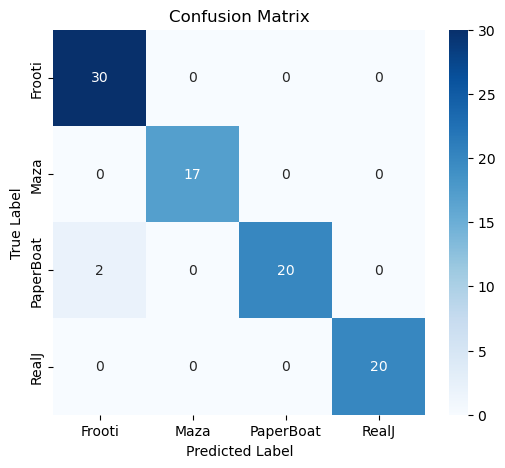

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)
labels = np.unique(all_y_true)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# LDA Plot for Subtracted Data

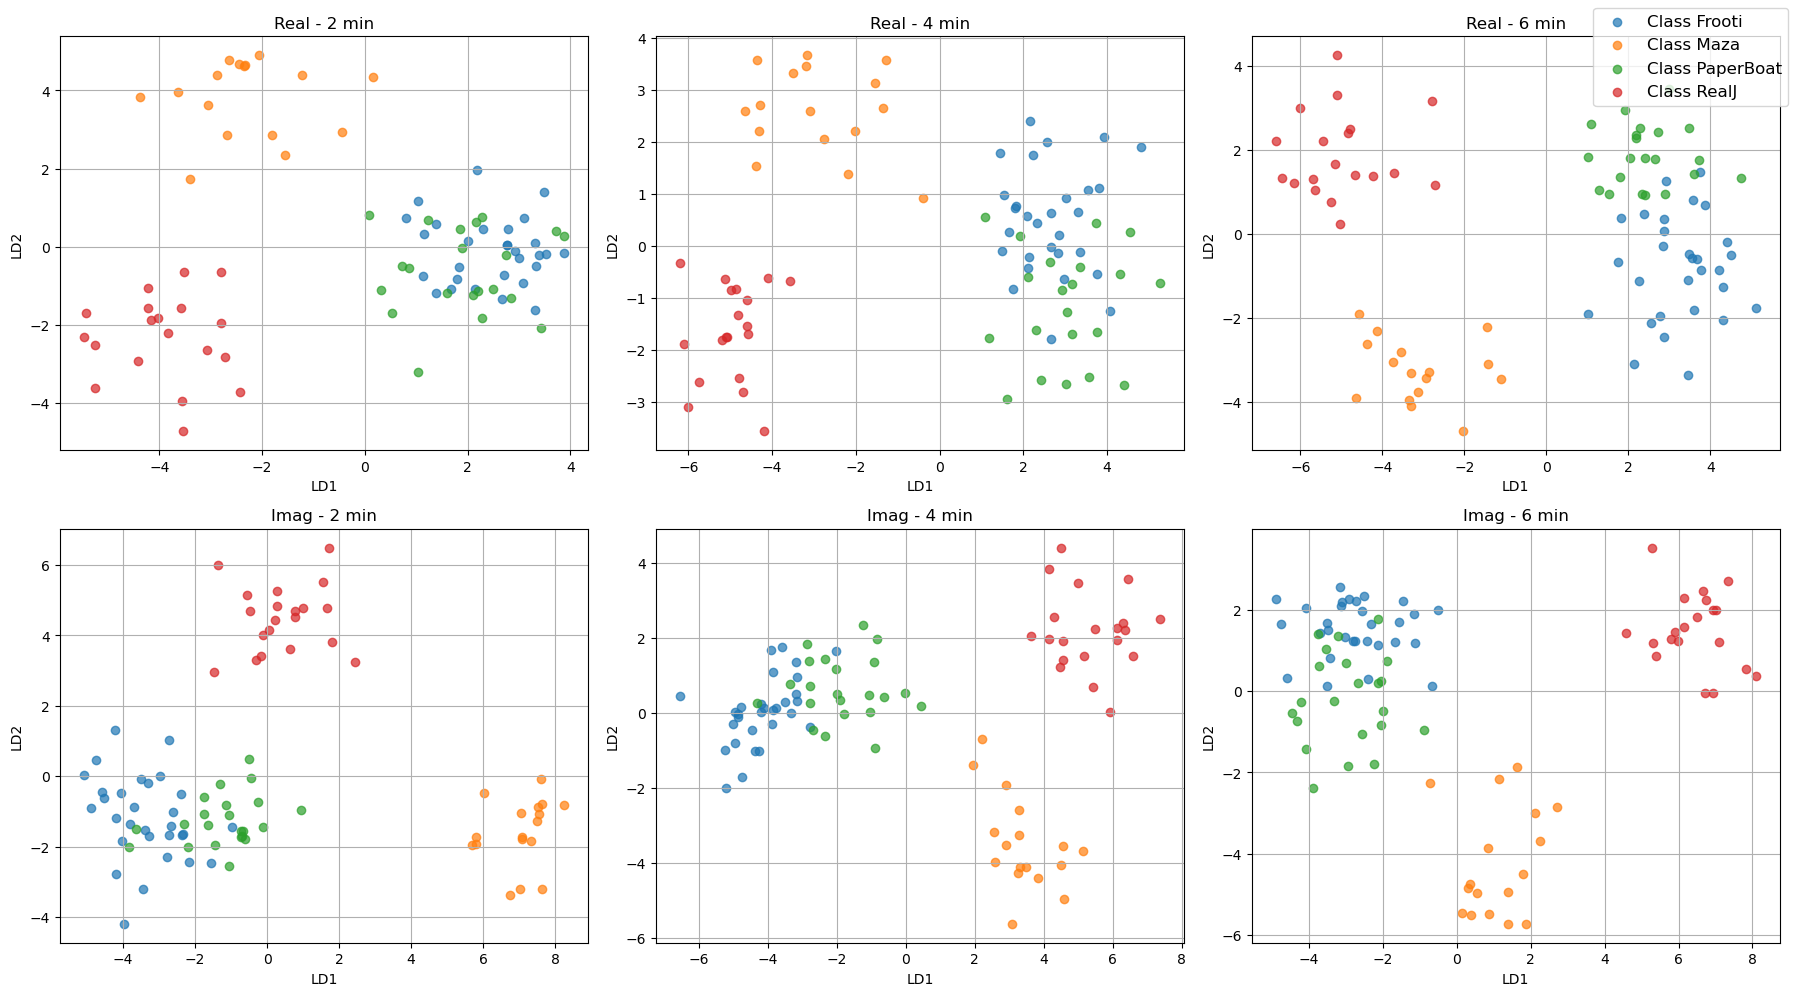

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import os

def run_lda_on_groups(folder, file_list, axs, row_offset, folder_name):
    """
    Runs LDA on groups of 4 consecutive CSV files inside one folder.
    Each group corresponds to 4 classes.

    Parameters:
        folder (str): Folder path containing CSVs
        file_list (list): Ordered list of file names (strings)
        axs: matplotlib Axes grid (2x3)
        row_offset: int, 0 for first row, 1 for second row
        folder_name: str, used in subplot titles
    """
    num_groups = len(file_list) // 4
    group_labels = {0: "2 min", 1: "4 min", 2: "6 min"}

    for g in range(num_groups):
        # Get 4 consecutive files
        group_files = file_list[g*4 : (g+1)*4]

        X_list, y_list = [], []

        for fname in group_files:
            path = os.path.join(folder, fname)
            df = pd.read_csv(path)

            # 4th column (index 3) is labels
            y_list.append(df.iloc[:, 3].values)

            # From 5th column (index 4:) are features
            X_list.append(df.iloc[:, 4:].values)

        # Stack all
        X = np.vstack(X_list)
        y = np.hstack(y_list)

        # Apply LDA (reduce to 2D)
        lda = LDA(n_components=2)
        X_lda = lda.fit_transform(X, y)

        # Subplot position
        ax = axs[row_offset, g]

        for label in np.unique(y):
            ax.scatter(X_lda[y == label, 0], X_lda[y == label, 1],
                       label=f"Class {label}", alpha=0.7)

        ax.set_xlabel("LD1")
        ax.set_ylabel("LD2")
        ax.set_title(f"{folder_name} - {group_labels[g]}")
        ax.grid(True)


# -------------------------
# USAGE
# -------------------------
real_folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/subtract/here/real"
imag_folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/subtract/here/imag"

# Provide ordered file names inside each folder
real_files = [
    "t12_tF_subtracted_r.csv", "t12_tP_subtracted_r.csv", "t22M_subtracted_r.csv", "t22R_subtracted_r.csv",
    "t14_tF_subtracted_r.csv", "t14_tP_subtracted_r.csv", "t24M_subtracted_r.csv", "t24R_subtracted_r.csv",
    "t16_tF_subtracted_r.csv", "t16_tP_subtracted_r.csv", "t26M_subtracted_r.csv", "t26R_subtracted_r.csv"
]

imag_files = [
    "t12_tF_subtracted_i.csv", "t12_tP_subtracted_i.csv", "t22M_subtracted_i.csv", "t22R_subtracted_i.csv",
    "t14_tF_subtracted_i.csv", "t14_tP_subtracted_i.csv", "t24M_subtracted_i.csv", "t24R_subtracted_i.csv",
    "t16_tF_subtracted_i.csv", "t16_tP_subtracted_i.csv", "t26M_subtracted_i.csv", "t26R_subtracted_i.csv"
]

# Create 2x3 grid for 6 plots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Run real (top row) and imag (bottom row)
run_lda_on_groups(real_folder, real_files, axs, row_offset=0, folder_name="Real")
run_lda_on_groups(imag_folder, imag_files, axs, row_offset=1, folder_name="Imag")

# Put legend once (outside)
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=12)

plt.tight_layout()
plt.show()


### Classification - KNN Clustering

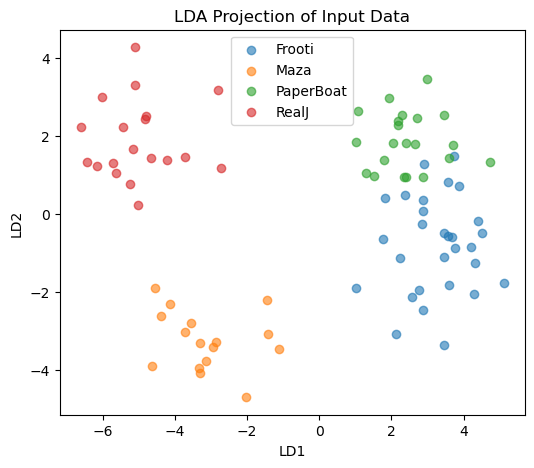

In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# ----------- LOAD DATA -----------
folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/subtract/here/real"
file_list = [
    "t16_tF_subtracted_r.csv", 
    "t16_tP_subtracted_r.csv", 
    "t26M_subtracted_r.csv", 
    "t26R_subtracted_r.csv"
]

X_list, y_list = [], []
for fname in file_list:
    path = os.path.join(folder, fname)
    df = pd.read_csv(path)

    y_list.append(df.iloc[:, 3].values)     # Labels (4th col)
    X_list.append(df.iloc[:, 4:].values)    # Features (from 5th col)

X = np.vstack(X_list)
y = np.hstack(y_list)

# ----------- BASIC LDA PROJECTION -----------
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(6,5))
for label in np.unique(y):
    plt.scatter(X_lda[y==label, 0], X_lda[y==label, 1], label=str(label), alpha=0.6)
plt.legend()
plt.title("LDA Projection of Input Data")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()


In [26]:
import numpy as np

print("Shape of feature matrix X:", X.shape)
print("Shape of label vector y:", y.shape)

# Unique labels and counts
unique_classes, counts = np.unique(y, return_counts=True)
print("\nClass distribution:")
for cls, cnt in zip(unique_classes, counts):
    print(f"  Class {cls}: {cnt} samples")

print("\nSample features (first 2 rows):")
print(X[:2])

Shape of feature matrix X: (85, 51)
Shape of label vector y: (85,)

Class distribution:
  Class Frooti: 29 samples
  Class Maza: 16 samples
  Class PaperBoat: 21 samples
  Class RealJ: 19 samples

Sample features (first 2 rows):
[[4.327      4.32433133 4.3199279  4.33977595 4.35324443 4.35197734
  4.34222862 4.32128903 4.28843597 4.25188815 4.2125448  4.16925069
  4.13540265 4.10007147 4.0664157  4.04095486 4.01329018 3.98531641
  3.96794197 3.95539051 3.9456431  3.93563837 3.92274323 3.90995629
  3.90743581 3.90560692 3.90391327 3.90260496 3.89948589 3.89188767
  3.89102774 3.89910353 3.89381073 3.89       3.89       3.88787604
  3.88       3.88       3.88766371 3.88938902 3.88485537 3.88314813
  3.88826273 3.88       3.88       3.88       3.89137543 3.89580359
  3.89275235 3.9001354  3.901     ]
 [4.502      4.49292651 4.46405369 4.43730198 4.40471669 4.36581876
  4.32927633 4.28887769 4.2422974  4.20135182 4.15687673 4.12108709
  4.08689184 4.0519783  4.01975471 3.99503288 3.9766010

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

n_splits = 5
knn = KNeighborsClassifier(n_neighbors=3)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_accs = []
all_y_true, all_y_pred = [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_lda, y), 1):
    X_train, X_test = X_lda[train_idx], X_lda[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    fold_accs.append(acc)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")


Fold 1: Accuracy = 0.9412
Fold 2: Accuracy = 1.0000
Fold 3: Accuracy = 0.8824
Fold 4: Accuracy = 0.9412
Fold 5: Accuracy = 0.9412


In [42]:
# Overall accuracy
mean_acc = np.mean(fold_accs)
print("\n===== Final Results =====")
print(f"Mean {n_splits}-Fold CV Accuracy: {mean_acc:.4f}")

# Confusion matrix & classification report
cm = confusion_matrix(all_y_true, all_y_pred)
report = classification_report(all_y_true, all_y_pred)

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)



===== Final Results =====
Mean 5-Fold CV Accuracy: 0.9412

Confusion Matrix:
 [[26  0  3  0]
 [ 0 16  0  0]
 [ 2  0 19  0]
 [ 0  0  0 19]]

Classification Report:
               precision    recall  f1-score   support

      Frooti       0.93      0.90      0.91        29
        Maza       1.00      1.00      1.00        16
   PaperBoat       0.86      0.90      0.88        21
       RealJ       1.00      1.00      1.00        19

    accuracy                           0.94        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.94      0.94      0.94        85



# Subplots of LDA of the adulterated Versions of 2 classes - Frooti and PaperBoat, at the different time instance

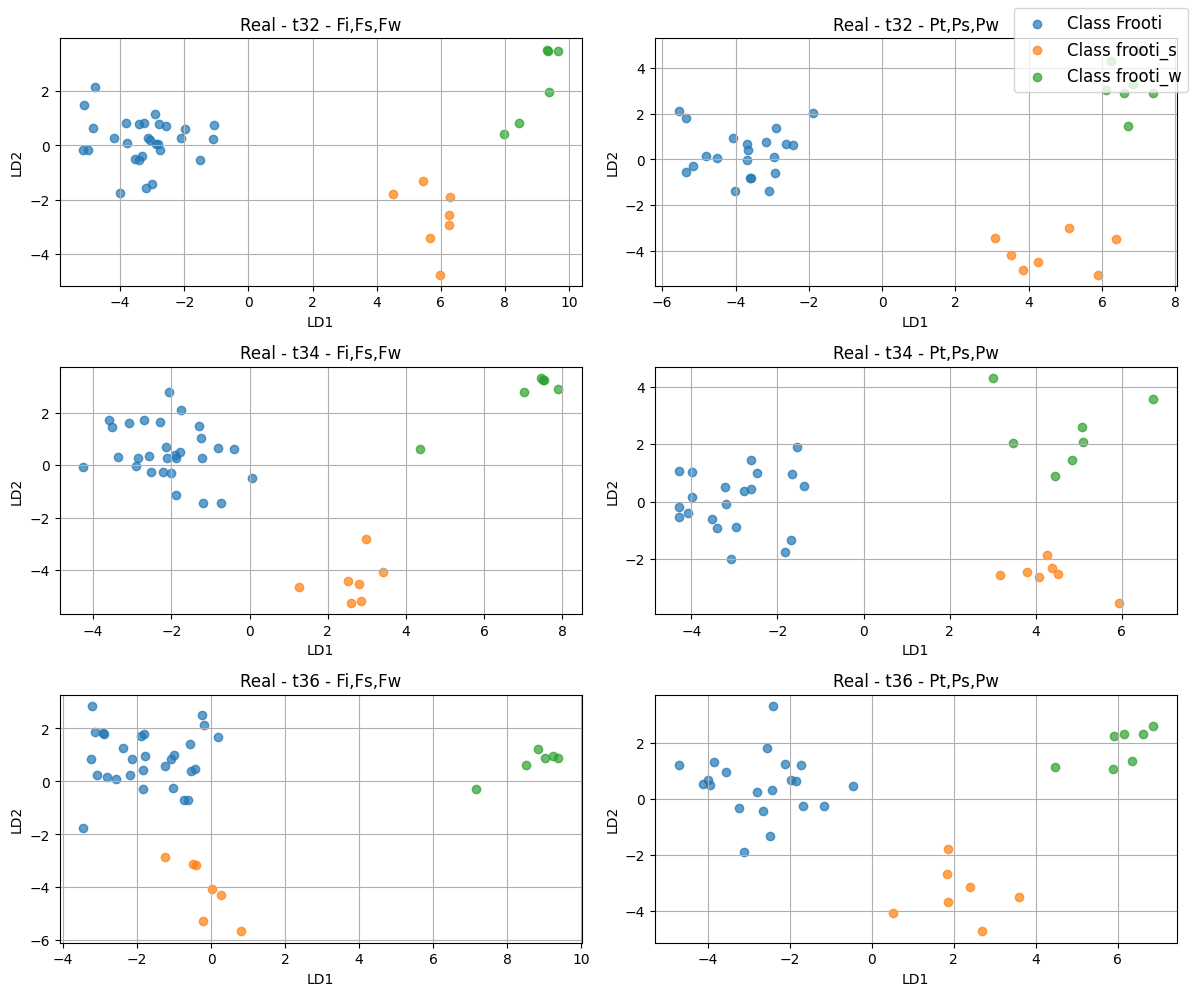

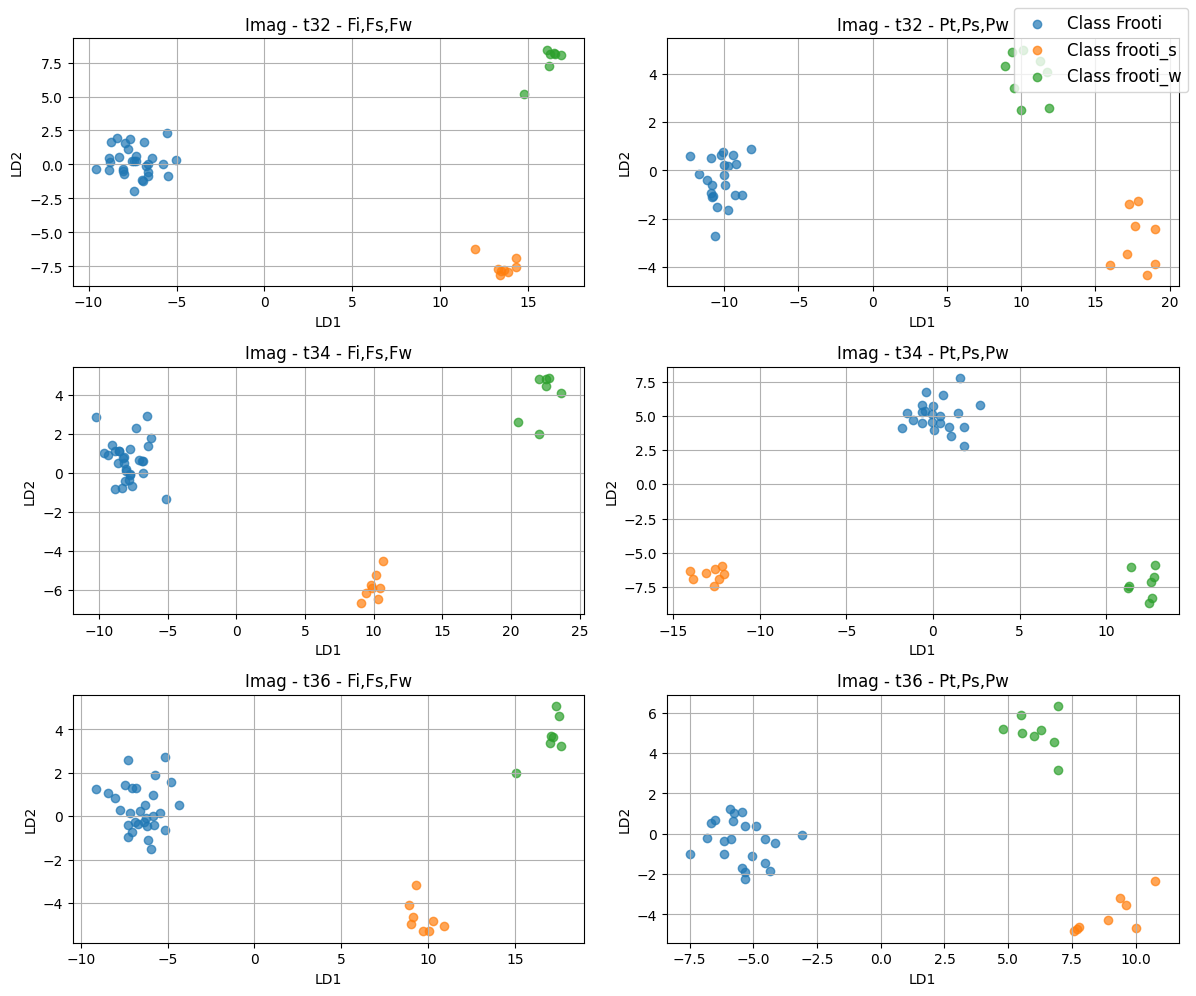

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import os

def run_lda_subplot(ax, folder, files, title):
    """Run LDA on given 3 files and plot in provided axis."""
    X_list, y_list = [], []
    for fname in files:
        df = pd.read_csv(os.path.join(folder, fname))
        y_list.append(df.iloc[:, 3].values)   # labels
        X_list.append(df.iloc[:, 4:].values)  # features
    
    X = np.vstack(X_list)
    y = np.hstack(y_list)

    lda = LDA(n_components=2)
    X_lda = lda.fit_transform(X, y)

    for label in np.unique(y):
        ax.scatter(X_lda[y == label, 0], X_lda[y == label, 1],
                   label=f"Class {label}", alpha=0.7)

    ax.set_xlabel("LD1")
    ax.set_ylabel("LD2")
    ax.set_title(title)
    ax.grid(True)


def plot_by_time_and_class(folder, files, folder_name):
    """
    Makes subplot grid: rows = times (t32, t34, t36), cols = class groups (Fruit, Pack).
    Each subplot compares 3 classes within that group.
    """
    times = ["t32", "t34", "t36"]
    groups = [["Fi", "Fs", "Fw"], ["Pt", "Ps", "Pw"]]

    fig, axs = plt.subplots(len(times), len(groups), figsize=(12, 10))

    for i, t in enumerate(times):
        for j, g in enumerate(groups):
            # pick the 3 files for this time and group
            group_files = [f for f in files if f.startswith(t) and any(cl in f for cl in g)]
            run_lda_subplot(axs[i, j], folder, group_files, f"{folder_name} - {t} - {','.join(g)}")

    # Put legend once (outside)
    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right", fontsize=12)

    plt.tight_layout()
    plt.show()


# -------------------------
# USAGE
# -------------------------
real_folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/alt_data/split/here/real"
imag_folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/alt_data/split/here/imag"

real_files = [
    "t32Fi_r.csv", "t32Fs_r.csv", "t32Fw_r.csv",
    "t34Fi_r.csv", "t34Fs_r.csv", "t34Fw_r.csv", 
    "t36Fi_r.csv", "t36Fs_r.csv", "t36Fw_r.csv",
    "t32Pt_r.csv", "t32Ps_r.csv", "t32Pw_r.csv",
    "t34Pt_r.csv", "t34Ps_r.csv", "t34Pw_r.csv", 
    "t36Pt_r.csv", "t36Ps_r.csv", "t36Pw_r.csv"
]

imag_files = [
    "t32Fi_i.csv", "t32Fs_i.csv", "t32Fw_i.csv",
    "t34Fi_i.csv", "t34Fs_i.csv", "t34Fw_i.csv", 
    "t36Fi_i.csv", "t36Fs_i.csv", "t36Fw_i.csv",
    "t32Pt_i.csv", "t32Ps_i.csv", "t32Pw_i.csv",
    "t34Pt_i.csv", "t34Ps_i.csv", "t34Pw_i.csv", 
    "t36Pt_i.csv", "t36Ps_i.csv", "t36Pw_i.csv"
]

# Plot 6 subplots (3 times × 2 groups)
plot_by_time_and_class(real_folder, real_files, "Real")
plot_by_time_and_class(imag_folder, imag_files, "Imag")


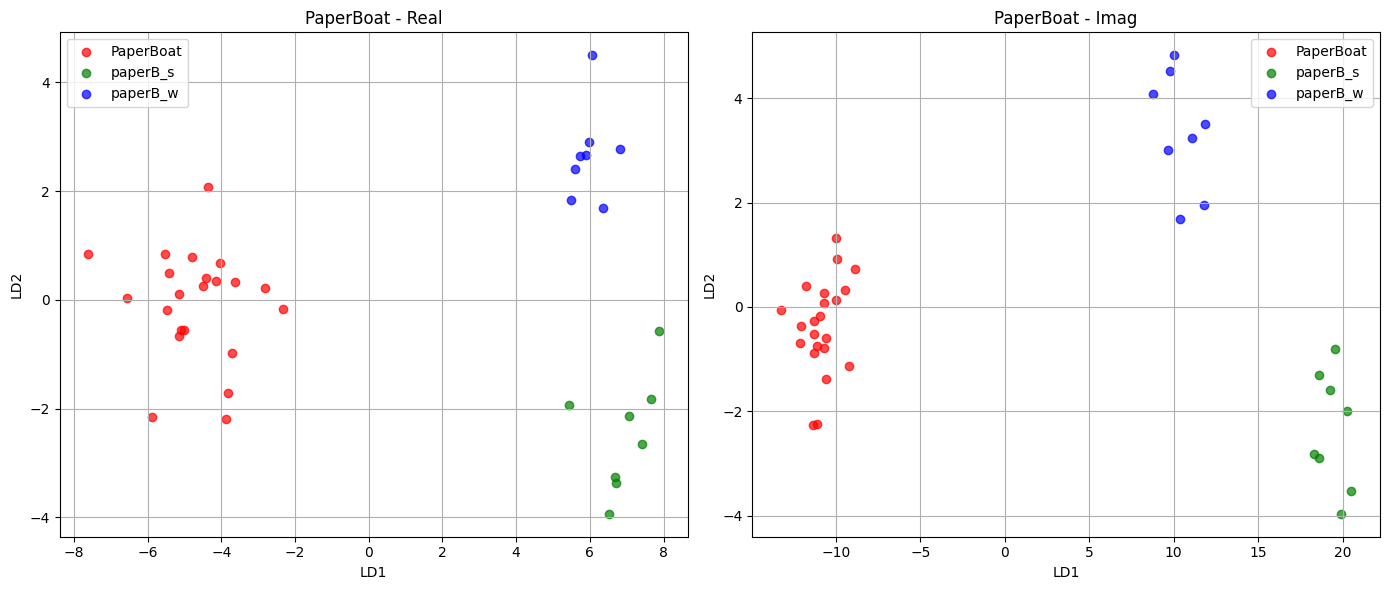

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import os

# Colors for the 3 Frooti classes
colors = {
    "PaperBoat": "red",
    "paperB_s": "green",
    "paperB_w": "blue"
}

def run_lda_for_files(ax, folder, files, title):
    X_list, y_list = [], []

    for fname in files:
        df = pd.read_csv(os.path.join(folder, fname), header=None)  # no header
        y_list.append(df.iloc[:, 3].astype(str).values)            # labels
        X_list.append(df.iloc[:, 4:].astype(float).values)         # features

    X = np.vstack(X_list)
    y = np.hstack(y_list)

    lda = LDA(n_components=2)
    X_lda = lda.fit_transform(X, y)

    # Plot only Frooti classes
    for label in np.unique(y):
        if label in colors:
            ax.scatter(X_lda[y == label, 0], X_lda[y == label, 1],
                       label=label, alpha=0.7, color=colors[label])

    ax.set_xlabel("LD1")
    ax.set_ylabel("LD2")
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

# ---------------- USAGE ----------------
real_folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/alt_data/split/here/real"
imag_folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/alt_data/split/here/imag"

real_files = ["t32Pt_r.csv", "t32Ps_r.csv", "t32Pw_r.csv"]
imag_files = ["t32Pt_i.csv", "t32Ps_i.csv", "t32Pw_i.csv"]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

run_lda_for_files(axs[0], real_folder, real_files, "PaperBoat - Real")
run_lda_for_files(axs[1], imag_folder, imag_files, "PaperBoat - Imag")

plt.tight_layout()
plt.show()


## Classification using KNN on Adulterated Raw data

### For Frooti Data

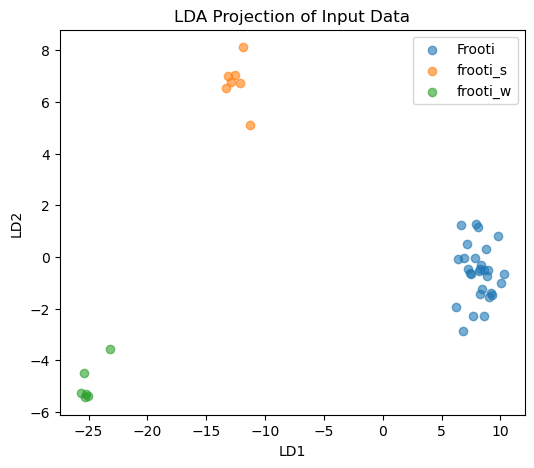

In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# ----------- LOAD DATA -----------
folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/alt_data/split/here/imag"
file_list = [
    "t32Fi_i.csv", 
    "t32Fs_i.csv", 
    "t32Fw_i.csv", 
]

X_list, y_list = [], []
for fname in file_list:
    path = os.path.join(folder, fname)
    df = pd.read_csv(path)

    y_list.append(df.iloc[:, 3].values)     # Labels (4th col)
    X_list.append(df.iloc[:, 4:].values)    # Features (from 5th col)

X = np.vstack(X_list)
y = np.hstack(y_list)

# ----------- BASIC LDA PROJECTION -----------
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(6,5))
for label in np.unique(y):
    plt.scatter(X_lda[y==label, 0], X_lda[y==label, 1], label=str(label), alpha=0.6)
plt.legend()
plt.title("LDA Projection of Input Data")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()


In [40]:
import numpy as np

print("Shape of feature matrix X:", X.shape)
print("Shape of label vector y:", y.shape)

# Unique labels and counts
unique_classes, counts = np.unique(y, return_counts=True)
print("\nClass distribution:")
for cls, cnt in zip(unique_classes, counts):
    print(f"  Class {cls}: {cnt} samples")

print("\nSample features (first 2 rows):")
print(X[:2])

Shape of feature matrix X: (42, 51)
Shape of label vector y: (42,)

Class distribution:
  Class Frooti: 29 samples
  Class frooti_s: 7 samples
  Class frooti_w: 6 samples

Sample features (first 2 rows):
[[-6.28915344e+01 -5.54159030e+01 -4.85820548e+01 -4.24017422e+01
  -3.71189923e+01 -3.23500974e+01 -2.80737651e+01 -2.42574098e+01
  -2.08701440e+01 -1.78910028e+01 -1.53371107e+01 -1.31941147e+01
  -1.13128902e+01 -9.67054558e+00 -8.24389871e+00 -7.01056903e+00
  -5.95036576e+00 -5.07301526e+00 -4.33565295e+00 -3.69623389e+00
  -3.14481434e+00 -2.67197462e+00 -2.26751754e+00 -1.92113309e+00
  -1.64051975e+00 -1.40184457e+00 -1.19565677e+00 -1.01852295e+00
  -8.66779843e-01 -7.35958347e-01 -6.28466863e-01 -5.37481938e-01
  -4.60139373e-01 -3.94877216e-01 -3.39069955e-01 -2.90380205e-01
  -2.47868731e-01 -2.12072567e-01 -1.82943388e-01 -1.57892514e-01
  -1.36868685e-01 -1.19018549e-01 -1.03046635e-01 -8.84804514e-02
  -7.66544239e-02 -6.48810767e-02 -5.47435128e-02 -4.53839457e-02
  -3

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

n_splits = 5
knn = KNeighborsClassifier(n_neighbors=3)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_accs = []
all_y_true, all_y_pred = [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_lda, y), 1):
    X_train, X_test = X_lda[train_idx], X_lda[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    fold_accs.append(acc)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")


Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 1.0000
Fold 3: Accuracy = 1.0000
Fold 4: Accuracy = 1.0000
Fold 5: Accuracy = 1.0000


In [44]:
# Overall accuracy
mean_acc = np.mean(fold_accs)
print("\n===== Final Results =====")
print(f"Mean {n_splits}-Fold CV Accuracy: {mean_acc:.4f}")

# Confusion matrix & classification report
cm = confusion_matrix(all_y_true, all_y_pred)
report = classification_report(all_y_true, all_y_pred)

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)



===== Final Results =====
Mean 5-Fold CV Accuracy: 1.0000

Confusion Matrix:
 [[29  0  0]
 [ 0  7  0]
 [ 0  0  6]]

Classification Report:
               precision    recall  f1-score   support

      Frooti       1.00      1.00      1.00        29
    frooti_s       1.00      1.00      1.00         7
    frooti_w       1.00      1.00      1.00         6

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



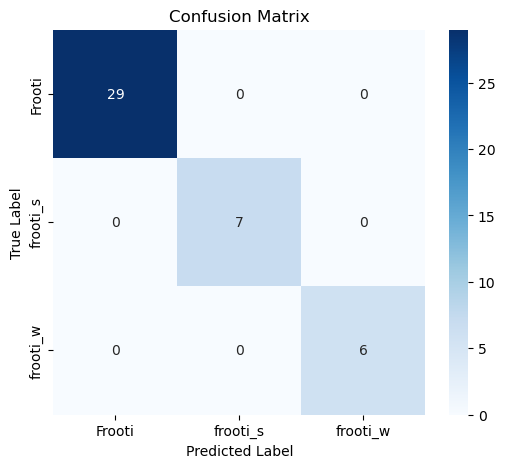

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Labels from your true values
labels = np.unique(all_y_true)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## For PaperBoat Data

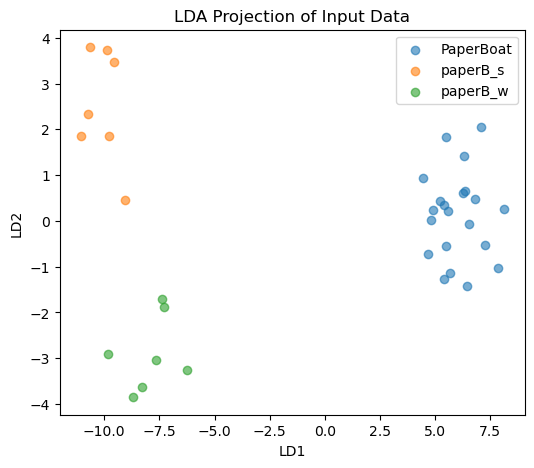

In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# ----------- LOAD DATA -----------
folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/alt_data/split/here/imag"
file_list = [
    "t32Pt_i.csv", 
    "t32Ps_i.csv", 
    "t32Pw_i.csv", 
]

X_list, y_list = [], []
for fname in file_list:
    path = os.path.join(folder, fname)
    df = pd.read_csv(path)

    y_list.append(df.iloc[:, 3].values)     # Labels (4th col)
    X_list.append(df.iloc[:, 4:].values)    # Features (from 5th col)

X = np.vstack(X_list)
y = np.hstack(y_list)

# ----------- BASIC LDA PROJECTION -----------
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(6,5))
for label in np.unique(y):
    plt.scatter(X_lda[y==label, 0], X_lda[y==label, 1], label=str(label), alpha=0.6)
plt.legend()
plt.title("LDA Projection of Input Data")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()


In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

n_splits = 5
knn = KNeighborsClassifier(n_neighbors=3)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_accs = []
all_y_true, all_y_pred = [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_lda, y), 1):
    X_train, X_test = X_lda[train_idx], X_lda[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    fold_accs.append(acc)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")


Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 1.0000
Fold 3: Accuracy = 1.0000
Fold 4: Accuracy = 1.0000
Fold 5: Accuracy = 1.0000


In [52]:
# Overall accuracy
mean_acc = np.mean(fold_accs)
print("\n===== Final Results =====")
print(f"Mean {n_splits}-Fold CV Accuracy: {mean_acc:.4f}")

# Confusion matrix & classification report
cm = confusion_matrix(all_y_true, all_y_pred)
report = classification_report(all_y_true, all_y_pred)

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)



===== Final Results =====
Mean 5-Fold CV Accuracy: 1.0000

Confusion Matrix:
 [[21  0  0]
 [ 0  7  0]
 [ 0  0  7]]

Classification Report:
               precision    recall  f1-score   support

   PaperBoat       1.00      1.00      1.00        21
    paperB_s       1.00      1.00      1.00         7
    paperB_w       1.00      1.00      1.00         7

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



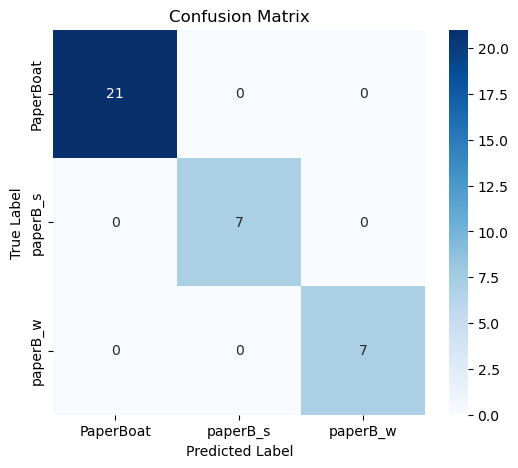

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Labels from your true values
labels = np.unique(all_y_true)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Subtracted Adulterated Data

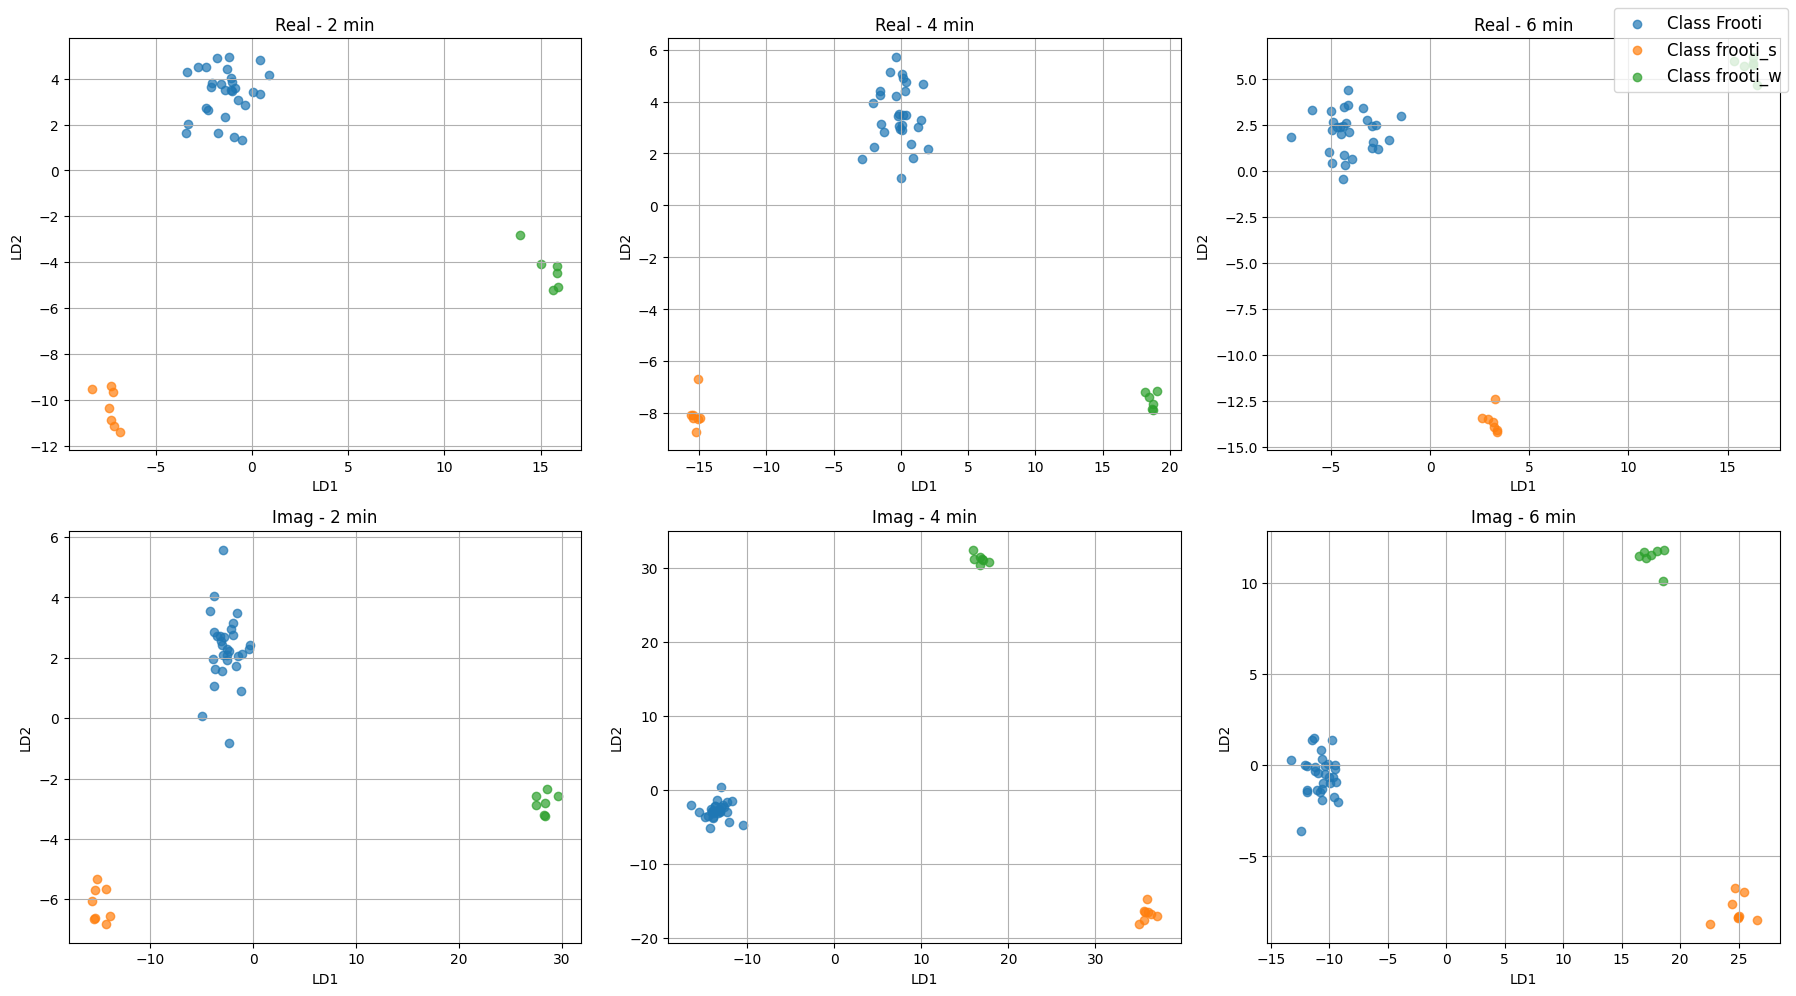

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import os

def run_lda_on_groups(folder, file_list, axs, row_offset, folder_name):
    """
    Runs LDA on groups of 4 consecutive CSV files inside one folder.
    Each group corresponds to 4 classes.

    Parameters:
        folder (str): Folder path containing CSVs
        file_list (list): Ordered list of file names (strings)
        axs: matplotlib Axes grid (2x3)
        row_offset: int, 0 for first row, 1 for second row
        folder_name: str, used in subplot titles
    """
    num_groups = len(file_list) // 3
    group_labels = {0: "2 min", 1: "4 min", 2: "6 min"}

    for g in range(num_groups):
        # Get 4 consecutive files
        group_files = file_list[g*3 : (g+1)*3]

        X_list, y_list = [], []

        for fname in group_files:
            path = os.path.join(folder, fname)
            df = pd.read_csv(path)

            # 4th column (index 3) is labels
            y_list.append(df.iloc[:, 3].values)

            # From 5th column (index 4:) are features
            X_list.append(df.iloc[:, 4:].values)

        # Stack all
        X = np.vstack(X_list)
        y = np.hstack(y_list)

        # Apply LDA (reduce to 2D)
        lda = LDA(n_components=2)
        X_lda = lda.fit_transform(X, y)

        # Subplot position
        ax = axs[row_offset, g]

        for label in np.unique(y):
            ax.scatter(X_lda[y == label, 0], X_lda[y == label, 1],
                       label=f"Class {label}", alpha=0.7)

        ax.set_xlabel("LD1")
        ax.set_ylabel("LD2")
        ax.set_title(f"{folder_name} - {group_labels[g]}")
        ax.grid(True)


# -------------------------
# USAGE
# -------------------------
real_folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/alt_data/subtract/here/real"
imag_folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/alt_data/subtract/here/imag"

# Provide ordered file names inside each folder
real_files = [
    "t32Fi_subtracted_r.csv", "t32Fs_subtracted_r.csv", "t32Fw_subtracted_r.csv",
    "t34Fi_subtracted_r.csv", "t34Fs_subtracted_r.csv", "t34Fw_subtracted_r.csv",
    "t36Fi_subtracted_r.csv", "t36Fs_subtracted_r.csv", "t36Fw_subtracted_r.csv"
]

imag_files = [
    "t32Fi_subtracted_i.csv", "t32Fs_subtracted_i.csv", "t32Fw_subtracted_i.csv",
    "t34Fi_subtracted_i.csv", "t34Fs_subtracted_i.csv", "t34Fw_subtracted_i.csv",
    "t36Fi_subtracted_i.csv", "t36Fs_subtracted_i.csv", "t36Fw_subtracted_i.csv"
]

# Create 2x3 grid for 6 plots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Run real (top row) and imag (bottom row)
run_lda_on_groups(real_folder, real_files, axs, row_offset=0, folder_name="Real")
run_lda_on_groups(imag_folder, imag_files, axs, row_offset=1, folder_name="Imag")

# Put legend once (outside)
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=12)

plt.tight_layout()
plt.show()


### Classification using KNN 

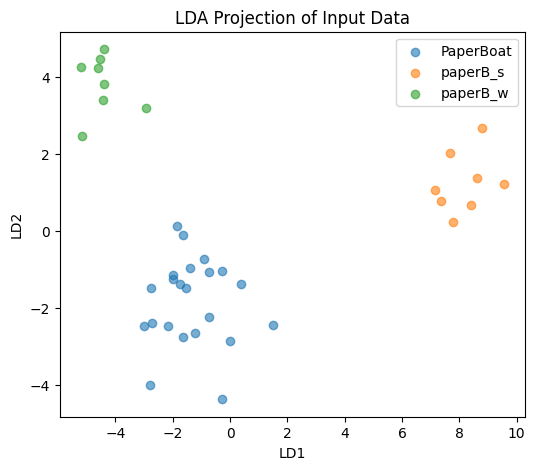

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# ----------- LOAD DATA -----------
folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/alt_data/subtract/here/imag"
file_list = [
    "t32Pt_subtracted_i.csv", 
    "t32Ps_subtracted_i.csv", 
    "t32Pw_subtracted_i.csv", 
]

X_list, y_list = [], []
for fname in file_list:
    path = os.path.join(folder, fname)
    df = pd.read_csv(path)

    y_list.append(df.iloc[:, 3].values)     # Labels (4th col)
    X_list.append(df.iloc[:, 4:].values)    # Features (from 5th col)

X = np.vstack(X_list)
y = np.hstack(y_list)

# ----------- BASIC LDA PROJECTION -----------
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(6,5))
for label in np.unique(y):
    plt.scatter(X_lda[y==label, 0], X_lda[y==label, 1], label=str(label), alpha=0.6)
plt.legend()
plt.title("LDA Projection of Input Data")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()


In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

n_splits = 5
knn = KNeighborsClassifier(n_neighbors=3)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_accs = []
all_y_true, all_y_pred = [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_lda, y), 1):
    X_train, X_test = X_lda[train_idx], X_lda[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    fold_accs.append(acc)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")


Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 1.0000
Fold 3: Accuracy = 1.0000
Fold 4: Accuracy = 1.0000
Fold 5: Accuracy = 1.0000


In [20]:
# Overall accuracy
mean_acc = np.mean(fold_accs)
print("\n===== Final Results =====")
print(f"Mean {n_splits}-Fold CV Accuracy: {mean_acc:.4f}")

# Confusion matrix & classification report
cm = confusion_matrix(all_y_true, all_y_pred)
report = classification_report(all_y_true, all_y_pred)

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)



===== Final Results =====
Mean 5-Fold CV Accuracy: 1.0000

Confusion Matrix:
 [[22  0  0]
 [ 0  8  0]
 [ 0  0  8]]

Classification Report:
               precision    recall  f1-score   support

   PaperBoat       1.00      1.00      1.00        22
    paperB_s       1.00      1.00      1.00         8
    paperB_w       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# Testing With Selected Data

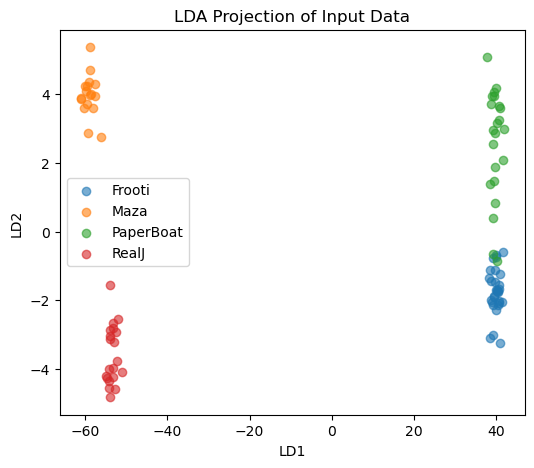

In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# ----------- LOAD DATA -----------
folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/here/imag"
file_list = [
    "t12_tF_i.csv", 
    "t12_tP_i.csv", 
    "t22M_i.csv", 
    "t22R_i.csv"
]

X_list, y_list = [], []
for fname in file_list:
    path = os.path.join(folder, fname)
    df = pd.read_csv(path)

    y_list.append(df.iloc[:, 3].values)     # Labels (4th col)
    X_list.append(df.iloc[:, 4:].values)    # Features (from 5th col)

X = np.vstack(X_list)
y = np.hstack(y_list)

# ----------- BASIC LDA PROJECTION -----------
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(6,5))
for label in np.unique(y):
    plt.scatter(X_lda[y==label, 0], X_lda[y==label, 1], label=str(label), alpha=0.6)
plt.legend()
plt.title("LDA Projection of Input Data")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()


In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

n_splits = 5
knn = KNeighborsClassifier(n_neighbors=3)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_accs = []
all_y_true, all_y_pred = [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_lda, y), 1):
    X_train, X_test = X_lda[train_idx], X_lda[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    fold_accs.append(acc)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")


Fold 1: Accuracy = 0.9444
Fold 2: Accuracy = 0.9444
Fold 3: Accuracy = 1.0000
Fold 4: Accuracy = 1.0000
Fold 5: Accuracy = 1.0000


In [61]:
# Overall accuracy
mean_acc = np.mean(fold_accs)
print("\n===== Final Results =====")
print(f"Mean {n_splits}-Fold CV Accuracy: {mean_acc:.4f}")

# Confusion matrix & classification report
cm = confusion_matrix(all_y_true, all_y_pred)
report = classification_report(all_y_true, all_y_pred)

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)



===== Final Results =====
Mean 5-Fold CV Accuracy: 0.9778

Confusion Matrix:
 [[30  0  0  0]
 [ 0 17  0  0]
 [ 2  0 20  0]
 [ 0  0  0 20]]

Classification Report:
               precision    recall  f1-score   support

      Frooti       0.94      1.00      0.97        30
        Maza       1.00      1.00      1.00        17
   PaperBoat       1.00      0.91      0.95        22
       RealJ       1.00      1.00      1.00        20

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



Accuracy on selected points: 0.9375

Classification Report:
               precision    recall  f1-score   support

      Frooti       0.86      1.00      0.92         6
        Maza       1.00      1.00      1.00         3
   PaperBoat       1.00      0.75      0.86         4
       RealJ       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.95        16
weighted avg       0.95      0.94      0.94        16



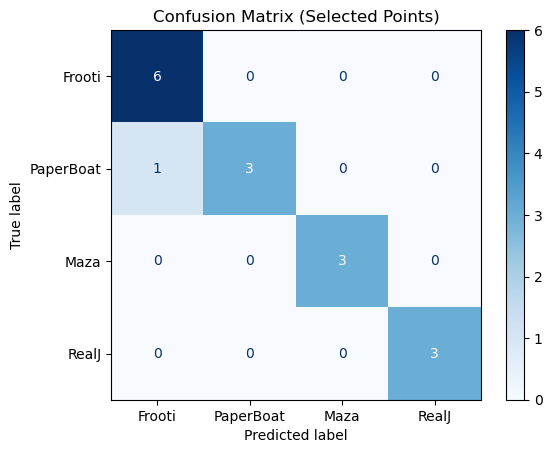

/tmp/ipykernel_15752/3570363535.py:74: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(point[0], point[1],


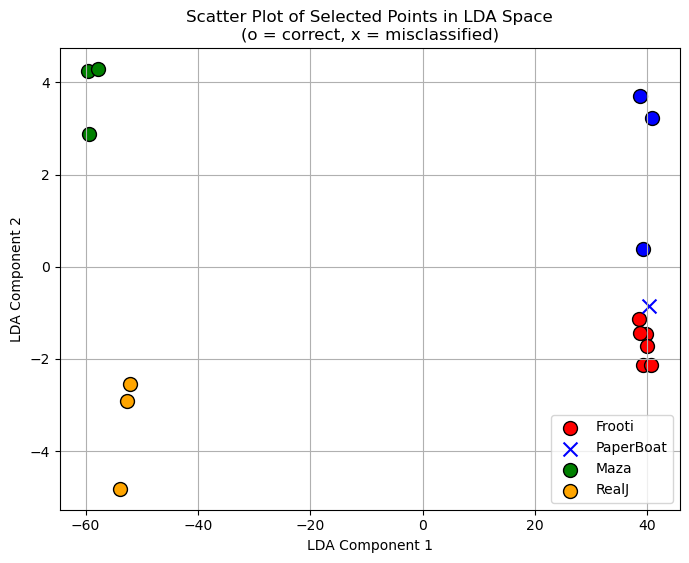

In [71]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

def get_subset_from_csvs(csv_dict, indices_dict):
    """
    Reads CSV files per class and collects rows based on indices provided.
    Assumes:
        - First 4 columns are metadata
        - Column 3 (index=3) contains the class label (redundant, we override it with dict key)
        - Columns 4 onwards are feature data
    """
    X_new, y_new = [], []

    for class_label, csv_path in csv_dict.items():
        df = pd.read_csv(csv_path)

        if class_label in indices_dict:
            for idx in indices_dict[class_label]:
                if idx < len(df):
                    row = df.iloc[idx, 4:].values.astype(float)  # features only
                    X_new.append(row)
                    y_new.append(class_label)
                else:
                    print(f"⚠️ Warning: Index {idx} out of range for class {class_label} in {csv_path}")

    return np.array(X_new), np.array(y_new)


# === Your setup ===
csv_dict = {
    "Frooti": "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/here/imag/t12_tF_i.csv",
    "PaperBoat": "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/here/imag/t12_tP_i.csv",
    "Maza": "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/here/imag/t22M_i.csv",
    "RealJ": "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/TransSplit/here/imag/t22R_i.csv"
}

indices_dict = {
    "Frooti": [2, 6, 8, 16, 21, 28],
    "PaperBoat": [2, 5, 10, 21],
    "Maza": [5, 9, 11],
    "RealJ" : [1, 4, 6]
}

# Collect new subset
X_new, y_new = get_subset_from_csvs(csv_dict, indices_dict)

# Project into trained LDA space
X_new_lda = lda.transform(X_new)

# Predict with trained KNN
y_pred = knn.predict(X_new_lda)

# === Results ===
print("Accuracy on selected points:", accuracy_score(y_new, y_pred))
print("\nClassification Report:\n", classification_report(y_new, y_pred))

# Confusion matrix
cm = confusion_matrix(y_new, y_pred, labels=list(csv_dict.keys()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(csv_dict.keys()))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Selected Points)")
plt.show()

# === Scatter plot of selected points in LDA space ===
plt.figure(figsize=(8,6))

# Encode true labels to colors
unique_classes = list(csv_dict.keys())
colors = {cls: col for cls, col in zip(unique_classes, ["red", "blue", "green", "orange"])}

for i, (point, true_label, pred_label) in enumerate(zip(X_new_lda, y_new, y_pred)):
    plt.scatter(point[0], point[1], 
                color=colors[true_label], 
                marker="o" if true_label == pred_label else "x", 
                s=100, edgecolor="k", label=true_label if i==y_new.tolist().index(true_label) else "")

plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("Scatter Plot of Selected Points in LDA Space\n(o = correct, x = misclassified)")
plt.legend()
plt.grid(True)
plt.show()
